
## Project:  Allstate Claims Severity
#### Author:   Joshep Downs, James Peng, Megan Pera, Diana Rodenberger 
#### Purpose:  Evaluate multiple regression models to predict cost and severity of claims for AllState
#### Created:  10/29/2016

### Team name in Kaggle: UCB_207_1

## Link to Leaderboard
https://www.kaggle.com/c/allstate-claims-severity/leaderboard


### Topics included

#### 1) Preprocessing train set
#### 2) Data Exploration of Continous Variables
#### 3) Model 1: Linear Regression with dummy variables using RIDGE
#### 4) Model 2: PCA and Regression
#### 5) Model 3: Run regression models with Lasso
#### 6) Model 4: Run regression models with ElasticNet
#### 7) Model 5: Run regression models with DecisionTreeRegressor
#### 8) Estimate best parameters for classifier




In [3]:
%matplotlib inline
import unittest

# General libraries.
import re, os, sys
import numpy as np
import pandas as pd
import logging
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction import 
from sklearn import preprocessing

from sklearn.utils import shuffle

from sklearn.metrics import mean_absolute_error

from sklearn import linear_model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# regularization methos
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.feature_extraction import DictVectorizer as DV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold

import xgboost as xgb


## Preprocessing train set

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Transform the variable 'loss'
 
 4) Create training datasets and development datasets.

In [4]:
TARGET = 'loss'
TARGET_LOG = 'log_loss'
ID = 'id'

DATA_IN_DIR = "./data_in"
DATA_OUT_DIR = "./data_out"

TRAIN_CSV = "{0}/train.csv".format(DATA_IN_DIR)
TEST_CSV = "{0}/test.csv".format(DATA_IN_DIR)
SUBMISSION_CSV = "{0}/submission.csv".format(DATA_OUT_DIR)

print(TRAIN_CSV, TEST_CSV,SUBMISSION_CSV)

./data_in/train.csv ./data_in/test.csv ./data_out/submission.csv


In [5]:
train_data = pd.read_csv(TRAIN_CSV)
test_data = pd.read_csv(TEST_CSV)

print(train_data.shape)
print(test_data.shape)

(188318, 132)
(125546, 131)


In [ ]:
print(train_data.describe())
#print(test_data.describe())

train_data.describe()

### Exploratory Data Analysis


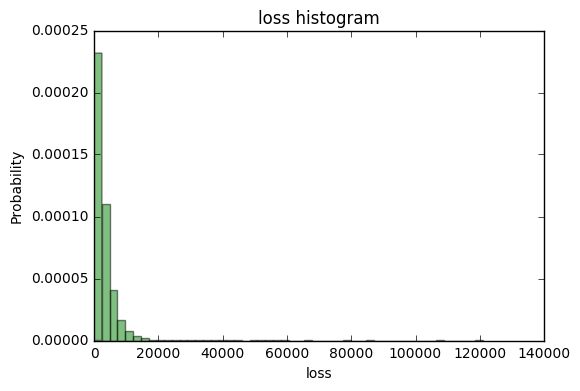

In [6]:
def plot_hist(y, title, x_label, y_label = 'Probability',  num_bins = 50 ):
    

    # the histogram of the data
    n, bins, patches = plt.hist(y, num_bins, normed=True, facecolor='green', alpha=0.5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    
plot_hist(train_data[TARGET], title= TARGET + ' histogram', x_label = TARGET )

Skewness 0.0966 Kurtosis -0.1415


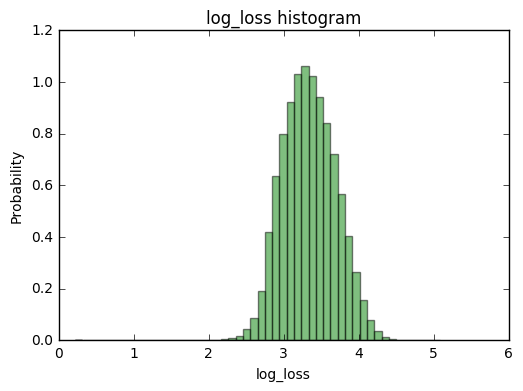

In [7]:

train_data[TARGET_LOG] = np.log10(train_data[TARGET]+1)

print("Skewness {0:.4f} Kurtosis {1:.4f}".format(train_data[TARGET_LOG].skew(), train_data[TARGET_LOG].kurt()))

plot_hist(train_data[TARGET_LOG], title= TARGET_LOG + ' histogram', x_label = TARGET_LOG )

In [9]:
test_data[TARGET] = 0
test_data[TARGET_LOG] = np.log10(train_data[TARGET]+1)

train_data['train'] = 1
test_data['train'] = 0

nrows_train = train_data.shape[0]
nrows_test = test_data.shape[0]
print(nrows_train,nrows_test )

# conts = [x for x in train_data.columns if 'cont' in x]
train_test = pd.concat((train_data, test_data), axis=0).reset_index(drop=True)

features = train_test.columns
cats = [feat for feat in features if 'cat' in feat]
conts = [feat for feat in features if 'cont' in feat]

for feat in cats:
    train_test[feat] = pd.factorize(train_test[feat], sort=True)[0]
    
train_data2 = train_test[train_test.train == 1].copy()

Y = train_data2[TARGET_LOG]
X = train_data2[cats + conts]
Id = train_data2[ID]

#X = X.copy()
# y = y.copy()

X_train, X_dev, y_train, y_dev, id_train, id_dev = train_test_split( X, Y, Id, test_size=0.33, random_state=1)


188318 125546


((126173, 130), (62145, 130), (126173,), (62145,))

In [10]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape

((313864, 134),
 (126173, 130),
 (62145, 130),
 (126173,),
 (62145,),
 (126173,),
 (62145,))

In [ ]:
X_train.head(), X_dev.head(), y_train.head(), y_dev.head(), id_train.head(), id_dev.head()

In [ ]:
train_test.head()

In [12]:
# fitting model on training data
model = xgb.XGBRegressor(max_depth=6, n_estimators=500, learning_rate=0.1, subsample=0.8, colsample_bytree=0.4,
                     min_child_weight = 3,  seed=7)
model.fit(X_train, y_train)
print(model)
#Making predictions
y_pred = model.predict(X_dev) 
predictions = [round(value) for value in y_pred]
# evaluat predictions 
actuals = y_dev
print(mean_absolute_error(actuals, predictions))
print(model.score(X_dev, y_dev)) 

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=7, silent=True, subsample=0.8)
0.300889117503
0.561140184073


In [ ]:
#split data frame into categorical variables, continous variables (including all 'contx' variables and 'loss') and ids

        

cat_cols=[]
cont_cols=[]
for c in df_data.columns:
    if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        cat_cols.append(c)
    elif c.find('cont')>=0:
        cont_cols.append(c)

df_cont_vars = df_data[cont_cols]
        
#convert categorical variables into dummy variables
df_dummy_vars=pd.get_dummies(df_data[cat_cols])

#create dataset with predictors
X = pd.concat([df_dummy_vars, df_cont_vars], axis=1)
#create dataset with dependent variable
y = np.log10(df_data.loss)
#create additioanl dataset with claim ids
id = df_data.id


X_train, X_dev, y_train, y_dev, id_train, id_dev = train_test_split( X, y, id, test_size=0.33, random_state=1)

In [ ]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape)


In [ ]:
X_train.head(5)

### Data Exploration of Continous Variables

More work needs to be done in this section

1) Check the distribution.

2) Check for correlation.

In [ ]:
#function to plot histograms of continous variables
def PlotHisContinousVars(df):

    plt.subplots(5,3, figsize=(10,15))
    jj = 0
    for column_name in df.columns:
        jj+=1
        plt.subplot(5,3,jj).hist(df[column_name],normed=True, bins=60)
        plt.subplot(5,3,jj).set(title=column_name)
    plt.show()
 

PlotHisContinousVars(df_cont_vars)


Plot dependent variable

In [ ]:
plt.cla()
plt.subplot(1,1,1).hist(y_train,normed=True, bins=60)
plt.subplot(1,1,1).set(title='loss')
plt.show()

#### TODO: more data exploration of continous variables

### Model 1: Linear Regression with dummy variables using RIDGE

We will try 3 different values of alpha

TODO: Find optimal values of alpha and other hyper-parameters

In [ ]:
### function to define Mean Absolute Error

def EstimateMEARidge(alpha, X_train,y_train,X_test, y_test):
    
    lr = linear_model.Ridge(alpha=alpha, normalize=True)

    # Train the model using the training sets
    lr.fit(X_train, y_train)

    # predict dev set
    preds = lr.predict(X_test)
   
    s = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error')
    
    print ('Regression - Ridge with alpha: ', alpha)

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))
    

#### alpha =0.00001

In [ ]:
pd.options.mode.chained_assignment = None

EstimateMEARidge(alpha=0.00001,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

#### alpha =0.001

In [ ]:
pd.options.mode.chained_assignment = None

EstimateMEARidge(alpha=0.001,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

#### alpha =0.1

In [ ]:
pd.options.mode.chained_assignment = None


EstimateMEARidge(alpha=0.1,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

The following are the baseline scores submitted for the competition

mean_absolute_error on training data: [-0.19872471 -0.19753498 -0.19821047]

mean_absolute_error on test data 0.198086964004104


### Model 2: PCA and Regression

Create a model for regression that uses PCA components for dummy variables + continous variables. Here are the steps to run this model:

1) Create a dataset with PCA components of dummy variables. 

2) Create a dataset with just continous variables. 

3) Create a combined dataset using datasets from step 1 and 2.

4) Do steps 1-3 for training data and dev data.

5) Run regression.

### Pre-processing: Find the number of components that explains most of the variance.

In [ ]:

from sklearn.decomposition import PCA
def P1():

    pca = PCA(n_components=200)
    pca.fit(X_train)
    cum_vars=[]
    components=[]
    cumulative_var=0
    for ii in range(len(pca.explained_variance_ratio_)):
        cumulative_var+=pca.explained_variance_ratio_[ii]
        cum_vars.append(cumulative_var)
        components.append(ii+1)
        
    plt.plot(components, cum_vars)
    #plt.title('Total variance explained by first K components')
    plt.show()
    return cum_vars

cum_vars=P1()



In [ ]:
print('Total variance explained by first PCA component: %0.6f \n' % cum_vars[0])
print('Total variance explained by 8 PCA components: %0.6f \n' % cum_vars[8])
print('Total variance explained by 50 PCA components: %0.6f \n' % cum_vars[49])
print('Total variance explained by 100 PCA components: %0.6f \n' % cum_vars[99])
print('Total variance explained by 200 PCA components: %0.6f \n' % cum_vars[199])

##### Since most of the variance is explained by one component, let's run PCA with two components

In [ ]:

#identify continous and dummy variables
cols_dummy_vars = list(df_dummy_vars.columns)
cols_cont_vars = list(df_cont_vars.columns)

#create a dataset with dummy variables for training data
df_train_dummy_vars=X_train[cols_dummy_vars]

#create a dataset with continous variables for training data
df_train_cont_vars=X_train[cols_cont_vars]

#create two datasets with continous and dummy variables for dev data
df_dev_cont_vars=X_dev[cols_cont_vars]
df_dev_dummy_vars=X_dev[cols_dummy_vars]


#Run PCA with two components
pca = PCA(n_components=200)
train_data_pca = pca.fit_transform(df_train_dummy_vars)
dev_data_pca = pca.transform(df_dev_dummy_vars)

#create dataframes with pca components
df_train_data_pca = pd.DataFrame({'comp1':train_data_pca[:,0],'comp2':train_data_pca[:,1]}, index=list(id_train.index))
df_dev_data_pca = pd.DataFrame({'comp1':dev_data_pca[:,0],'comp2':dev_data_pca[:,1]}, index=list(id_dev.index))


In [ ]:
train_data_pca.shape[1]

In [ ]:
#create dataframes with pca components
dic_train_pca ={}
ii=0
for ii in range(train_data_pca.shape[1]):
    dic_train_pca['comp'+ str(ii+1)]=train_data_pca[:,ii]
   

In [ ]:
df_train_data_pca = pd.DataFrame(dic_train_pca, index=list(id_train.index))

##### Create a new training set and dev set with pca components (for dummy variables) and continous variables

In [ ]:
X_train_pca = pd.concat([df_train_data_pca, df_train_cont_vars], axis=1)

In [ ]:
X_dev_pca = pd.concat([df_dev_data_pca, df_dev_cont_vars], axis=1)

In [ ]:
#checks

print(X_train.shape)
print(df_train_cont_vars.shape)
print(df_train_dummy_vars.shape)

print(df_train_data_pca.shape)
print(X_train_pca.shape)

### Run regression models with 50 PCA components

In [ ]:
EstimateMEARidge(alpha=0.00001,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

In [ ]:
EstimateMEARidge(alpha=0.1,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

### Model 3: Run regression models with Lasso

In [ ]:
def EstimateMEALasso(alpha, X_train,y_train,X_test, y_test):
    
    lr = linear_model.Lasso(alpha=alpha, normalize=True)

    # Train the model using the training sets
    lr.fit(X_train, y_train)

    # predict dev set
    preds = lr.predict(X_test)
   
    s = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error')
    
    print ('Regression - Lasso with alpha: ', alpha)

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))

In [ ]:
EstimateMEALasso(alpha=0.1,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

### Model 4: Run regression models with ElasticNet

In [ ]:
def EstimateMEAElasticNet(alpha, l1ratio, X_train,y_train,X_test, y_test):
    
    lr = linear_model.ElasticNet(alpha=alpha, l1_ratio =l1ratio, normalize=True)

    # Train the model using the training sets
    lr.fit(X_train, y_train)

    # predict dev set
    preds = lr.predict(X_test)
   
    s = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error')
    
    print ('Regression - MultiTaskElasticNet with alpha: ', alpha)

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))

In [ ]:
EstimateMEAElasticNet(alpha=0.1,l1ratio=.5, X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

### Model 5: Run regression models with DecisionTreeRegressor

In [ ]:
def EstimateMEADecisionTreeRegressor(max_depth, X_train,y_train,X_test, y_test):
    
    regr = DecisionTreeRegressor(max_depth=max_depth)

    regr.fit(X_train, y_train)
    preds = regr.predict(X_dev)
   
    s = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error')
    
    print ('Regression - DecisionTreeRegressor with max_depth: ', max_depth)

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))

In [ ]:
EstimateMEADecisionTreeRegressor(max_depth=5, X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

In [ ]:
EstimateMEADecisionTreeRegressor(max_depth=15, X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

### Estimate best parameters for classifier

The call to this function takes a long time. Need to check what is wrong. For now, I am leaving it documented

In [ ]:
from sklearn.grid_search import GridSearchCV

def EvaluateHyperParams(cls, params, X_data, y_data):
    
    pipeline = Pipeline([
     ('clf', cls),
    ])

    
    
    grid_search = GridSearchCV(pipeline, params)
    grid_search.fit(X_data, y_data)
    
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return best_parameters

In [ ]:
parameters = {
    'clf__alpha': (0.00001, .001),
    }
#best_parameters=EvaluateHyperParams(cls=linear_model.Lasso(),params=parameters,X_data=X_train, y_data=y_train)

### Predict the Test Dataset

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Predict loss based on 'best' model previously found : Ridge with alpha= 0.00001


In [ ]:
df_test = pd.read_csv('./data_in/test.csv')

In [ ]:
test_cat_cols=[]
test_cont_cols=[]
for c in df_test.columns:
    if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        test_cat_cols.append(c)
    elif c.find('cont')>=0:
        test_cont_cols.append(c)

test_df_cont_vars = df_test[test_cont_cols]
        
#convert categorical variables into dummy variables
test_df_dummy_vars=pd.get_dummies(df_test[test_cat_cols])

#create dataset with predictors
X_test = pd.concat([test_df_dummy_vars, test_df_cont_vars], axis=1)
id_test = df_test.id


In [ ]:

print('num columns in test: ', X_test.shape[1])
print('num columns in train: ', X_train.shape[1])

## Important note:

When transforming categorical variables into dummy variables, we get a different set of variables for the training data and the test data. The train data and the test data have different categories for some categorical variables; thus, when we tranform categorical variables to dummy variables then a different set of dummy variables for the train and test data. 

See file 'Allstate - Create train and test datasets with dummy vars' to fix this problem
